<a href="https://colab.research.google.com/github/ShubhamKasture67/AITA-LAB-1/blob/main/K_MEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Score  HelpfulnessNumerator  cluster
0      5                     1        0
1      1                     0        1
2      4                     1        0
3      2                     3        1
4      5                     0        0


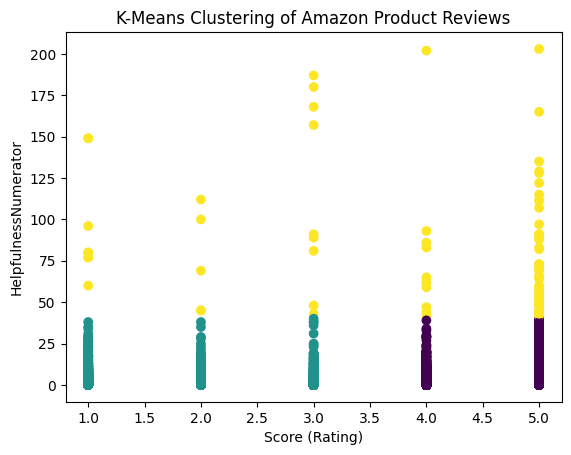

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

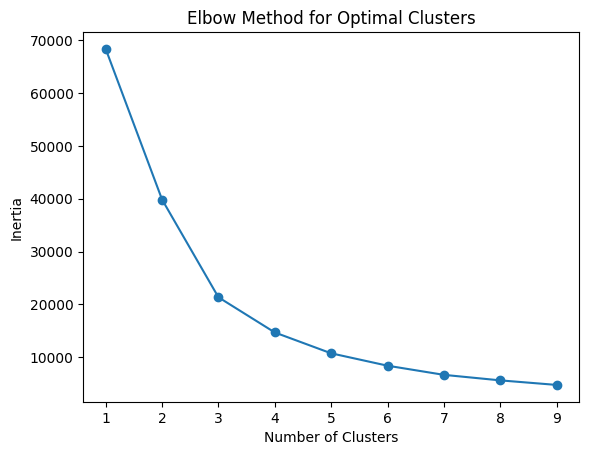

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset from the CSV file
df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip') # skip bad lines

# View the first few rows to understand the dataset
print(df.head())

# Step 2: Preprocess the data
features = df[['Score', 'HelpfulnessNumerator']]

# Drop any rows with missing data in these columns
features = features.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Print the clustered data
print(df[['Score', 'HelpfulnessNumerator', 'cluster']].head())

# Optional: Visualize the clusters
plt.scatter(df['Score'], df['HelpfulnessNumerator'], c=df['cluster'], cmap='viridis')
plt.xlabel('Score (Rating)')
plt.ylabel('HelpfulnessNumerator')
plt.title('K-Means Clustering of Amazon Product Reviews')
plt.show()

# Optional: Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


